<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Workshop_1_Descriptive_Statistic_And_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workshop 1
Fermín Méndez García A01703366

2- Medidas de tendencia central


Cuando obtenemos un data set de datos las medidadas de tendencias central media, moda y mediana nos sirven para obtener una idea de con que datos estamos tratando. Con estas medidas a primera vista podemos responde preguntas como ¿Cuál es la magnitud de los datos que tenemos? ¿Cuál es la distribución de los datos? ¿Qué valores se repiten más?

*  Media
*  Mediana
*  Moda



Por otra parte las medidas de dispersión nos ayudan a entender cómo se distrubuyen los datos y entender si tenemos valores muy parecidos o existen valores extremos en nuestros datos.

*   Varianza
*   Desviación estándar
*   Percentiles /quartiles

IQR Inter Quartiles
IQR1= -1.5 Q1+ Q2
IQR2= 1.5 Q3 +Q2

Para obtener un rango de datos no extremo podemos encontrar un limmite inferior y superior a partir de los quartiles:
*   Lim_inf= q2-1.5 q1
*   Lim _sup= q2 +1.5 q3
Con estos rangos los modelos predictuivos en ML funcionan mejor y es una medida para limpiar los datos.
Una técnica es que los valores que superen lo limites toman los valores de los limites para no perder datos.



In [24]:
import numpy as np
import pandas as pd
import yfinance as yf

BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1d")
BTC

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2023-08-11,29424.902344,29517.773438,29253.517578,29397.714844,29397.714844,10195168197
2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,29415.964844,6194358008
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914062,29282.914062,7329897180


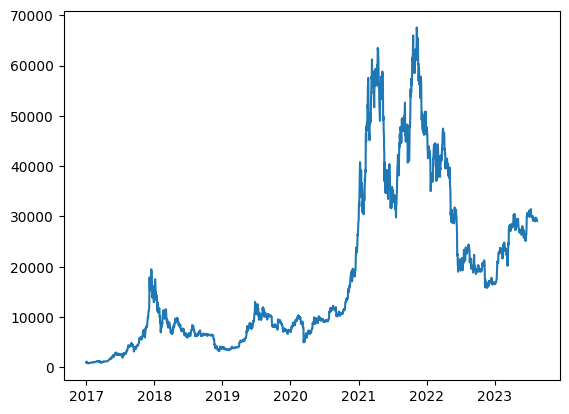

In [25]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Adj Close"])
show()


In [26]:
BTC.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2418 entries, 2017-01-01 to 2023-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2418 non-null   float64
 1   High       2418 non-null   float64
 2   Low        2418 non-null   float64
 3   Close      2418 non-null   float64
 4   Adj Close  2418 non-null   float64
 5   Volume     2418 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


Para calcular el interés obtenido en un periodo de tiempo. Siendo ER la tasa de efectividad en un periodo t tenemos que
I2=I1*(1+ER)^t
Por otra parte, cuando es interés compuesto y los periodos tienden a infinito tenemos que
I2=I1*e^r
Donde r es el número de periodos que se repite.

se puede sustituir el factor de crecimiento por e^t siempre para tener una aproximación si es compuesto a cada segundo o en muchos periodos.



Es común que manipulemos los datos originales. En este caso calcularemos el logaritmo de de los precios. Un resultado interesante es que
Effective_rate=e^t-1
Donde t es la cantidad de periodos


r=log(p1/p0)
Se usa para encontrar el retorno continuo compuesto.
Por otra parte se utiliza R para hacer referencia al retorno simple.


In [27]:
BTC["R"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
print(BTC["R"])


Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2023-08-11   -0.001083
2023-08-12    0.000621
2023-08-13   -0.004523
2023-08-14    0.004287
2023-08-15   -0.010378
Name: R, Length: 2418, dtype: float64


In [28]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [29]:
BTCR= BTCR.dropna()

Estadistica descriptiva de retornos



In [30]:
sumret = BTC["R"].describe()
sumret

count    2417.000000
mean        0.002178
std         0.039386
min        -0.371695
25%        -0.014606
50%         0.001470
75%         0.018931
max         0.252472
Name: R, dtype: float64

In [31]:
BTCR[BTCR["R"]<-0.15]

,R,r
Date,,
2017-09-14,-0.187411,-0.207530
2018-01-16,-0.168548,-0.184582
2018-02-05,-0.159688,-0.173982
2020-03-12,-0.371695,-0.464730
2022-06-13,-0.159747,-0.174053


In [32]:
BTCR[BTCR["R"]>0.15].sort_values(by=['R'], ascending=False)

,R,r
Date,,
2017-12-07,0.252472,0.225119
2017-07-20,0.239361,0.214596
2017-12-06,0.199283,0.181724
2021-02-08,0.187465,0.171821
2020-03-19,0.181878,0.167104
2019-04-02,0.173560,0.160042
2019-10-25,0.155763,0.144761
2017-07-17,0.154724,0.143862
2017-09-15,0.152956,0.142330


In [33]:
print("The daily average return of Bitcoin is ", BTCR["r"].mean())
print("The daily variance of Bitcoin is ", BTCR["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTCR["r"].std())
print("The daily median return of Bitcoin is ",BTCR["r"].median())

The daily average return of Bitcoin is  0.0013953356408537441
The daily variance of Bitcoin is  0.001573445418760521
The daily standard deviation (volatility) of Bitcoin return is  0.039666678947959846
The daily median return of Bitcoin is  0.0014686626299020844


3- El histograma

Ahora tenemos dos elementos fundamentales para la estadística y teoría de probablidada: El histograma y Teorema del límite central:

El histograma es un gráfico de frecuencias

Histograma del df BTC

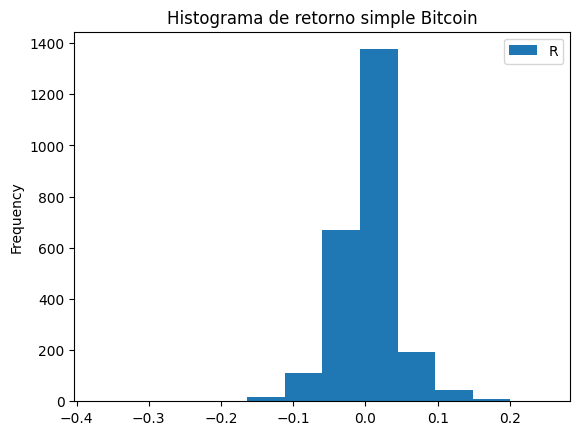

In [34]:
R_BTC= pd.DataFrame(BTCR[["R"]])
hist=R_BTC.plot.hist(bins=12,title="Histograma de retorno simple Bitcoin")


Una vez hemos calculado el retorno diario, podemos observar que la mayor frecuencua está entre -0.1 y 0.1, es decir que en casi todos los casos se puede perder o ganar 10% cómo máximo en la mayoría de los casos. Por otra parte que tengamos los rangos de -0.4 y 0.2 significa que ha habido casos extraordinarios donde se puede perder hasta el 40% en un solo día o por el contrario ganar el 20% en un solo día.

PDF: Probability distribution function

Para un evento aleatorio de n casos con las mismas probabilidades se tiene que la probabilidad de que un evento xi aparezca es 1/n.


#____________________________________________

Existen otros conceptos importantes como PDF probability density function.
Cumulative Density Function (CDF) que es la suma de todas las posibilidades de un evento y siempre suman 100%

Cuando las variables no datos discretos si no continuos ahora el calculo de una variable se traduce a un rango. Dada la función de densidada PDF que describe cómo es que se agrupan los datos, básicamente es una representación del histograma, entonces ahora basta encontrar el área bajo la curva de la función. Es decir, la integral de la PDF en un rango entra a y b define la probabilidad de que una variable continua aparezca.


5- Una PDF importante: La función de distribución normal.
Es una formula compleja para escribirla aqui. Pero la notación puede ser
X~N(media,var)
Donde X es una variable continua. La función es simétrica a partir de la media.
Propiedades importantes son:

*  La media +- 1 std abarca el 68% de los datos
*  La media +- 2 std abarca el 95% de los datos
*  La media +- 3 std abarca el 99% de los datos




5.2 Simulating the normal distribution

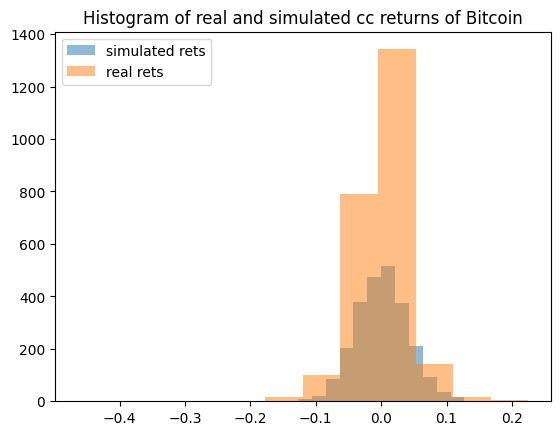

In [35]:
from matplotlib import pyplot
pyplot.clf()
rmean = BTCR["r"].mean()
rsd = BTCR["r"].std()
N = BTCR["r"].count()
simr= np.random.normal(loc=rmean,scale=rsd, size=N)
realr = BTCR["r"].to_numpy()

bins = 12

pyplot.hist(simr,bins,alpha=0.5,label='simulated rets')
pyplot.hist(realr,bins,alpha=0.5,label='real rets')
pyplot.legend(loc='upper left')
pyplot.title(label='Histogram of real and simulated cc returns of Bitcoin')

pyplot.show()

El rango simulado con la distribución normal no tiene datos tan extremos.
Las zonas que sobresalen significan que ha habido momentos donde la ganancia es mayor a la esperada o que la perdida es mayor que la esperada. Dado el rango de gráfica del histograma podemos decir que la inversión en bitcoins es de alto riesgo, pues se puede perder hasta el 40% en un solo día.